## Fetching AHBA Data

In [18]:
import abagen
import nibabel as nib
import nilearn as nil
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
'''
Obtain data from specific donors (donor 9861 and donor 10021).
To obtain data from all available donors, pass in 'all' instead of the donor list.
'''
files = abagen.fetch_microarray(donors=['9861', '10021'], verbose=0, data_dir='./data')

## Loading AHBA Data

#### See the Reference API on [abagen.io](https://abagen.readthedocs.io/en/latest/api.html#module-abagen.io) for a comprehensive list of functions that assist with loading ABHA data files.

In [4]:
# List donor ID keys
print(files.keys())

# List the downloaded files available for donor 9861
sorted(files['9861'])

dict_keys(['9861', '10021'])


['annotation', 'microarray', 'ontology', 'pacall', 'probes']

In [5]:
# Print the annotation for donor 9861
data = files['9861']
annotation = abagen.io.read_annotation(data['annotation'])
annotation

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
sample_id,,,,,,,,,,,,,
1,4077,22,594,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7
2,4323,11,2985,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9
3,4323,18,2801,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8
4,4440,18,2273,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3
5,4266,17,2785,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,4751,67,1090,CB,PV-III,"III, right, paravermis",51241,84,119,113,8.7,-43.4,-22.4
943,4752,67,1082,CB,PV-IV,"IV, right, paravermis",51239,84,108,122,8.5,-49.7,-8.9
944,4758,67,1074,CB,PV-VIIB,"VIIB, right, paravermis",56063,84,140,135,7.9,-72.3,-40.6


In [6]:
# Print the probes for donor 9861
probes = abagen.io.read_probes(data['probes'])
probes

,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
probe_id,,,,,,
1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733,9
1058684,CUST_15185_PI416261804,731,C9,complement component 9,735,5
1058683,A_32_P203917,731,C9,complement component 9,735,5
1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740,11
1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740,11
...,...,...,...,...,...,...
1071207,A_32_P69683,1012195,A_32_P69683,AGILENT probe A_32_P69683 (non-RefSeq),<NA>,NaN
1071208,A_32_P87582,1012196,A_32_P87582,AGILENT probe A_32_P87582 (non-RefSeq),<NA>,NaN
1071209,A_32_P885445,1012197,A_32_P885445,AGILENT probe A_32_P885445 (non-RefSeq),<NA>,NaN


## Parcellations

#### Demo Parcellation

(146, 182, 155)


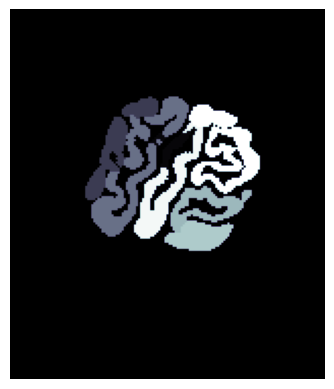

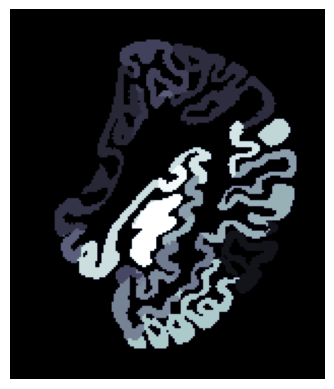

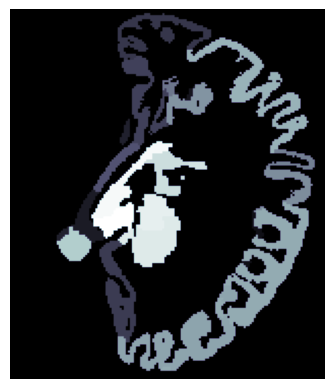

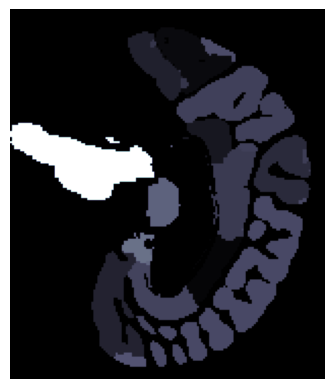

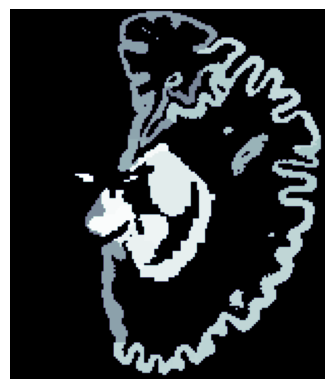

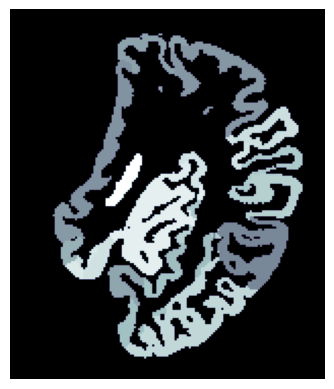

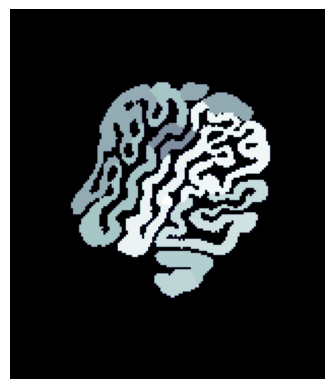

In [74]:
'''
atlas is a dictionary with two keys: 
1. 'image': filepath to a NIFTI image containing the atlas data
2. 'info': filepath to a CSV file containing extra parcellation info
'''
atlas = abagen.fetch_desikan_killiany()

im = nib.load(atlas['image'])

# Image type should be a'nibabel.nifti1.Nifti1Image'
#print(type(im))

# View metadata
#print(im.header)

# Get the shape of the numpy array
im_data = im.get_fdata()
print(im_data.shape)

for i in range(10, len(im_data), 20):
    plt.imshow(im_data[i], cmap="bone")
    plt.axis('off')
    plt.show()


#### Individualized Parcellation

9861


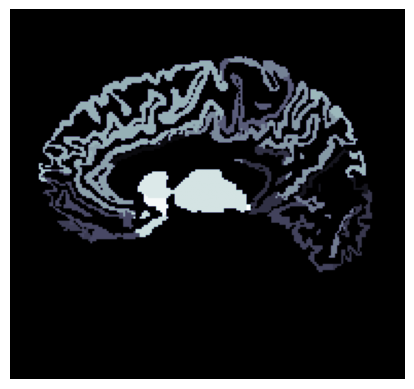

10021


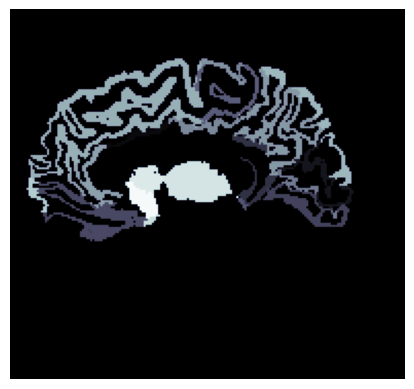

12876


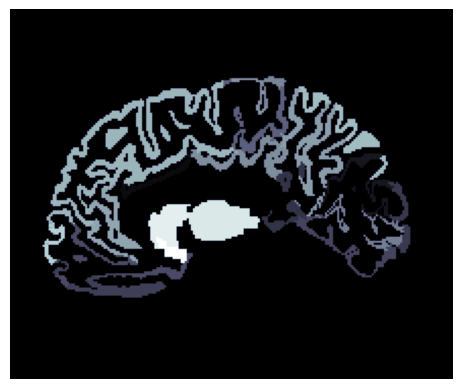

14380


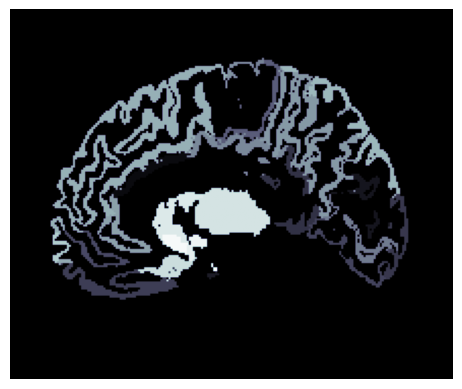

15496


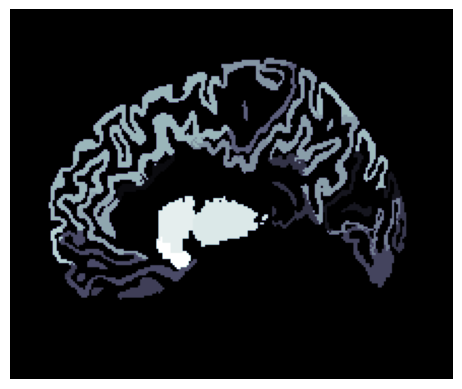

15697


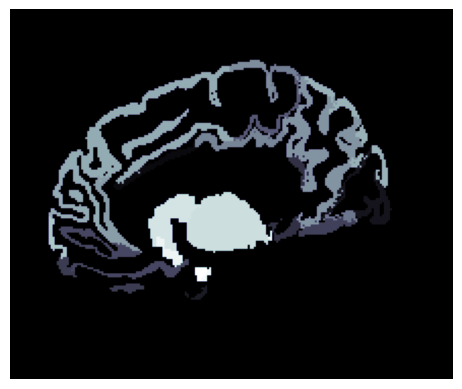

In [73]:
atlas = abagen.fetch_desikan_killiany(native=True)

for key in atlas['image']:
    im = nib.load(atlas['image'][key])
    im_data = im.get_fdata()
    print(key)
    plt.imshow(im_data[100], cmap="bone")
    plt.axis('off')
    plt.show()


## Parcellating Expression Data

#### See the [abagen docs](https://abagen.readthedocs.io/en/latest/user_guide/expression.html) for more information on parcellating expression data.

By default, data are normalized using a scaled robust [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) such that the expression values for a given gene will range from 0-1.
A value of 0 indicates the region with the lowest gene expression, while a value of 1 indicates the region with the highest.

Note that the generated pandas.DataFrame is an aggregate of the donor argument/s.

Interpreting the DataFrame:
- DataFrame rows correspond to region labels as defined in the atlas image.
- DataFrame columns correspond to genes.
- Entry values are microarray expression data normalized and aggregated across selected donors.

In [ ]:
# To obtain all donor image data
#expression = abagen.get_expression_data(atlas['image'])

# When using a volumetric image, it is recommended to include the additional information on the parcellation
# Note that the following function call loads all our data into memory, and will therefore be quite time-consuming
expression = abagen.get_expression_data(atlas['image'], atlas['info'])
expression